In [1]:
require(ggplot2)

Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [2]:
setwd("~/Documents/Miami_WBD/")

In [3]:
c=read.csv("filtered_otutable.csv", h=T, row.names=1)

In [4]:
s=read.csv("Miami_map.csv", h=T, as.is=T)

In [5]:
b=t(c)
d=cbind.data.frame(s,b)

In [6]:
head(d)

,Sample_name,Disease_state,rep,101015,1011502,101152,101218,1015518,101620,1018359,...,New.ReferenceOTU989,New.ReferenceOTU99,New.ReferenceOTU990,New.ReferenceOTU993,New.ReferenceOTU994,New.ReferenceOTU995,New.ReferenceOTU996,New.ReferenceOTU997,New.ReferenceOTU998,New.ReferenceOTU999
D7,D7,Diseased,two,0,63,0,13,1,0,0,...,6,12,4,0,5,6,36,14,0,0
D9,D9,Diseased,four,0,18,0,0,0,0,0,...,5,9,0,0,0,8,1,0,0,0
D8,D8,Diseased,three,0,47,0,0,15,0,0,...,8,12,5,0,42,23,383,0,0,0
D6,D6,Diseased,one,0,220,0,0,0,0,1,...,3,20,0,0,26,3,215,0,0,1
H9,H9,Healthy,four,0,0,48,0,0,0,1,...,0,0,13,1,0,40,0,0,0,0
H6,H6,Healthy,one,0,0,29,0,0,6,0,...,0,0,3,0,0,11,0,0,7,0


In [7]:
t= read.csv("rep_set_tax_assignments_silva_clean2.csv", header=FALSE)

In [8]:
colnames(t)=c("OTUID", "kingdom", "phylum", "class", "order", "family", "genus", "species", "evalue", "ref")

In [9]:
c1=t(c)
c1per=(c1/rowSums(c1))*100
b1=t(c1per)

In [10]:
tcof=t[,c("OTUID","class", "order", "family")]

In [11]:
b1t=merge(b1, tcof, by.x="row.names", by.y="OTUID")

In [12]:
b1tc=b1t
b1tc$family=NULL
b1tc$order=NULL
b1tc$Row.names=NULL

In [13]:
b1to=b1t
b1to$family=NULL
b1to$class=NULL
b1to$Row.names=NULL

In [14]:
b1tf=b1t
b1tf$class=NULL
b1tf$order=NULL
b1tf$Row.names=NULL

In [15]:
b1tg=b1t
b1tg$family=NULL
b1tg$class=NULL
b1tg$order=NULL
b1tg$Row.names=NULL

In [16]:
b1tcagg=aggregate(. ~ class, data=b1tc, FUN=sum)
b1tfagg=aggregate(. ~ family, data=b1tf, FUN=sum)
b1toagg=aggregate(. ~ order, data=b1to, FUN=sum)

In [17]:
b1tcagg10=b1tcagg[apply(b1tcagg[,2:NCOL(b1tcagg)], MARGIN=1, function(x) any(x>10)),]
b1tfagg10=b1tfagg[apply(b1tfagg[,2:NCOL(b1tfagg)], MARGIN=1, function(x) any(x>10)),]
b1toagg10=b1toagg[apply(b1toagg[,2:NCOL(b1toagg)], MARGIN=1, function(x) any(x>5)),]
#b1tgagg10=b1tgagg[apply(b1tgagg[,2:NCOL(b1tgagg)], MARGIN=1, function(x) any(x>10)),]

In [18]:
b1toagg10=as.data.frame(b1toagg10)

In [19]:
b1toagg10=b1toagg10[!(b1toagg10$order==""),]

In [20]:
b1toagg10=b1toagg10[!(b1toagg10$order=="uncultured"),]

In [21]:
b1toagg10

,order,D7,D9,D8,D6,H9,H6,D10,H10,H8,H7
14,Alteromonadales,3.7155698,14.877534,5.692362,13.610556,1.2727420,3.240761,1.744473,0.5726147,2.466073,0.4101437
32,Campylobacterales,0.3248342,9.640642,5.387754,3.726253,14.8297890,19.825831,4.174024,0.9061628,26.506639,67.8479520
63,Flavobacteriales,26.6597695,19.957821,16.550645,12.867805,1.1352794,1.772020,3.517198,0.2605397,1.225741,1.6968690
106,Oceanospirillales,3.9992435,3.606106,21.191779,21.821883,2.4500687,4.024956,3.983332,3.5129912,3.644389,1.8523483
122,Rhizobiales,1.4350554,3.365977,2.593307,2.374661,6.8424032,4.635848,4.491843,0.4008303,5.705530,1.1071199
126,Rickettsiales,7.1007431,13.253012,19.547061,7.538209,51.6325706,44.911399,67.653083,76.7318016,45.779221,21.7483380
140,Sphingobacteriales,12.9599964,7.600593,8.673879,8.952293,0.9961996,2.651532,2.387174,0.1946890,0.485189,0.0723783


In [22]:
row.names(b1toagg10)=b1toagg10$order
b1toagg10=b1toagg10[2:NCOL(b1toagg10)]
b1toagg10=t(b1toagg10)

ofull = data.frame(Samples= numeric(0), Counts= integer(0), Taxonomy = character(0))

for (i in 1:ncol(b1toagg10)) {
  fams=data.frame("Samples"=row.names(b1toagg10), 
                  "Counts"=b1toagg10[,i], "Taxonomy"=colnames(b1toagg10)[i])
  ofull=rbind(ofull,fams)
}

In [23]:
b1toagg10$rep=as.character(rownames(b1toagg10))

Warning message in b1toagg10$rep = as.character(rownames(b1toagg10)):
“Coercing LHS to a list”

In [24]:
fulldat=cbind(ofull, s)

In [25]:
head(fulldat)

,Samples,Counts,Taxonomy,Sample_name,Disease_state,rep
D7,D7,3.715570,Alteromonadales,D7,Diseased,two
D9,D9,14.877534,Alteromonadales,D9,Diseased,four
D8,D8,5.692362,Alteromonadales,D8,Diseased,three
D6,D6,13.610556,Alteromonadales,D6,Diseased,one
H9,H9,1.272742,Alteromonadales,H9,Healthy,four
H6,H6,3.240761,Alteromonadales,H6,Healthy,one


In [26]:
ggplotColours <- function(n = 5, h = c(0, 360) + 15){
  if ((diff(h) %% 360) < 1) h[2] <- h[2] - 360/n
  hcl(h = (seq(h[1], h[2], length = n)), c = 100, l = 65)
}

In [27]:
plotfamilyalltime=ggplot(data=fulldat, aes(x=rep, y=Taxonomy )) +
  geom_point(aes(size=Counts,color=Taxonomy)) +
  scale_colour_discrete(guide=FALSE)+
  scale_size_continuous(range=c(0,16), name="Percent") + theme_bw()+theme(legend.position = "left") +
  ggtitle("Microbiomes of Healthy and Diseased Corals from Miami")
plotfamilyalltime=plotfamilyalltime  + xlab("Pair") + ylab("Family") +
  theme(axis.text.y = element_text(color=ggplotColours(n=5)))+ facet_grid (Disease_state~., scales="free_x") 

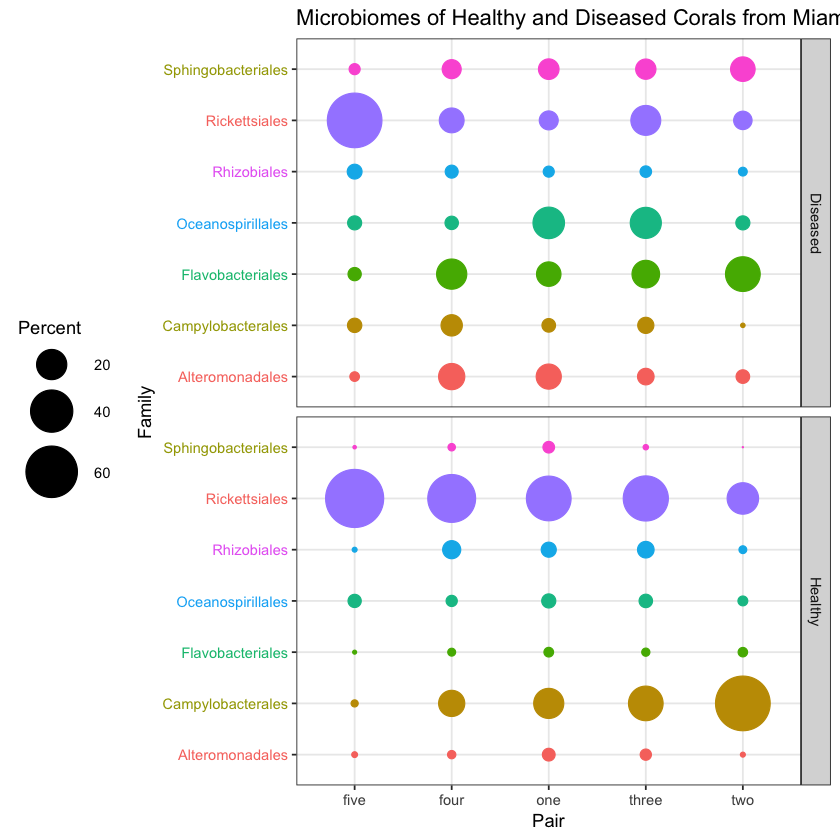

In [28]:
plotfamilyalltime

In [37]:
fulldat$rep=factor(fulldat$rep, levels=c("one", "two", "three", "four", "five"))


In [38]:
plotorderalltime=ggplot(data=fulldat, aes(x=rep, y=Taxonomy )) +
  geom_point(aes(size=Counts,color=Taxonomy)) +
  scale_colour_discrete(guide=FALSE)+
  scale_size_continuous(range=c(0,16), name="Percent") + theme_bw()+theme(legend.position = "left") 
plotorderalltime=plotorderalltime  +
  theme(axis.text.y = element_text(color=ggplotColours(n=7)))+ facet_grid (.~Disease_state, scales="free_x")+
 theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=14))+ 
xlab("Pair") + ylab("Order") 


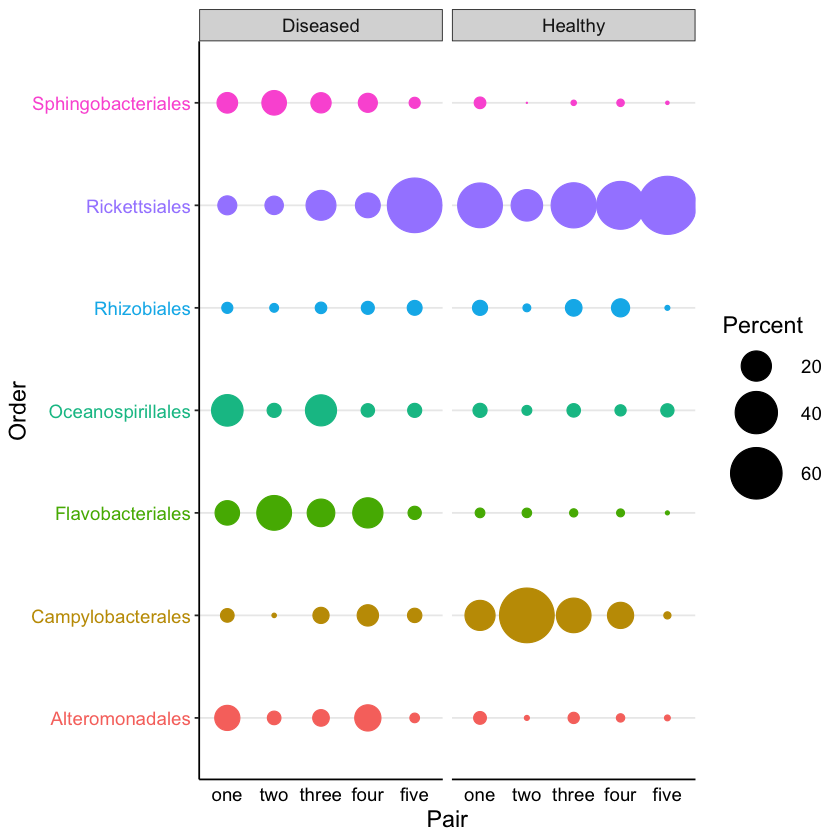

In [39]:
plotorderalltime

In [45]:
ggsave("~/Documents/Miami_WBD/rough_plots/Tax_bubbles_new.pdf", device="pdf", h=3, w=7.5) 